<a href="https://colab.research.google.com/github/JASADAMAN/Example_project/blob/main/Sentiment%20Analysis%20From%20Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# utilities
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/drive/MyDrive/DATA SET/Twitter data set /Sentiment140 Dataset.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
303694,0,1999539621,Mon Jun 01 20:23:46 PDT 2009,NO_QUERY,jiele,"@mmmfelicious Ugh, I want to see it live so ba..."
1011772,4,1881137346,Fri May 22 03:43:33 PDT 2009,NO_QUERY,kimbo7100,@axis155 Rome?! Wow! Need someone to carry you...
839205,4,1559325477,Sun Apr 19 10:50:45 PDT 2009,NO_QUERY,ohbrenlee,i love how los angelenos see the first sign of...
152801,0,1932821541,Tue May 26 22:17:57 PDT 2009,NO_QUERY,BIGKOAonHOT939,@Lauriei94 Happy B-Day ! Sorry I missed it Di...
259184,0,1985363087,Sun May 31 16:57:47 PDT 2009,NO_QUERY,Dany2311,@foxtrotonline Felt the same way when I came b...


In [ ]:
# created the funtion to clean data
import re
def cleanTxt(text):
   text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove@ mentions
   text = re.sub(r'#', '', text) # remove 
   text = re.sub(r'RT[\s]+', '', text) # remove RT
   text =re.sub(r'htpps?:\/\/\S+', '', text) # remove the hyper link
   text =re.sub(r'http://twitpic.com/2y1zl', '', text) # remove the hyper link
   text = re.sub(r'-', '', text) # remove -

   return text

In [ ]:
df['text'] = df['text'].apply(cleanTxt)
df['text'].head()

0       Awww, that's a bummer.  You shoulda got Dav...
1    is upset that he can't update his Facebook by ...
2     I dived many times for the ball. Managed to s...
3      my whole body feels itchy and like its on fire 
4     no, it's not behaving at all. i'm mad. why am...
Name: text, dtype: object

In [ ]:
from textblob import TextBlob

In [ ]:
# Create Funtion give Subjectivity
def  getSubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

# Create Function give Polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)
df

,target,ids,date,flag,user,text,Subjectivity,Polarity
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"Awww, that's a bummer. You shoulda got Dav...",0.633333,0.216667
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0.000000,0.000000
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...,0.500000,0.500000
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0.400000,0.200000
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am...",1.000000,-0.625000
...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,0.300000,1.000000
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com Very cool to hear old Walt intervi...,0.522500,0.290000
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,0.500000,0.200000
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,1.000000,1.000000


In [ ]:
from wordcloud import WordCloud 

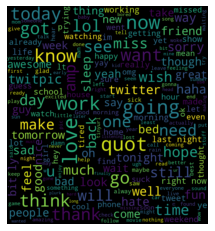

In [ ]:
# word cloud
allword = ''.join([twts for twts in  df['text']])
wordCloud = WordCloud(width = 1200, height = 1300, random_state = 600, max_font_size = 119).generate(allword)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create funtion to give score negative , neuture, positive
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neuture'
    else:
      return 'Positive'

df["Analysis"] = df['Polarity'].apply(getAnalysis)
df.head()

,target,ids,date,flag,user,text,Subjectivity,Polarity,Analysis
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"Awww, that's a bummer. You shoulda got Dav...",0.633333,0.216667,Positive
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0.000000,0.000000,Neuture
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...,0.500000,0.500000,Positive
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0.400000,0.200000,Positive
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am...",1.000000,-0.625000,Negative


In [ ]:
j = 1
sortedDF = df.sort_values(by='Polarity')
for  i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['text'][i])
        print()
        j = j +1

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
695832)  thank you! the problem is usually TOO many &quot;me breaks&quot; haha i saw your lucky feature, that is amazing! congrats 

695833)  Thanks!! I'm psyched!! So many people will get a shot through this! Gosh, so happy to make it happen for 'em!! 

695834) back at work, nice easy drive in today. Sun is shining. It's my 9th anniversary today! Going to Sea Watch rest. in Ft Lauderdale 

695835) is goin to take finals then after that only 1 more day til Summer  LVATT is the best album ever... I â¥ THE JONAS BROTHERS

695836)  have a great day catch up in 8 hour turkeytuesday over need 2 recover LOL  night ;)

695837)  keep things sweet and simple.. innit 

695838)  OMGGGGGG IM HOLDING THE NEW CD IN MY HANDS RIGHT NOWWW AHHHHHH IM SO HAPPPPYYY  THE CD IS BEAUUUTIIIFULLLL  IM SO HAPPY !!

695839) jiss chilln ou  cnt wait t get these exams ovr wii ;) xx

695840)  Thanks so much for the heads up! 

695841)  thanks so much for the

Positive    698331
Neuture     568300
Negative    333369
Name: Analysis, dtype: int64


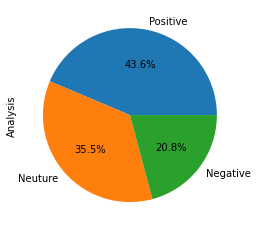

In [ ]:
print(df['Analysis'].value_counts())
df['Analysis'].value_counts().plot.pie( autopct='%1.1f%%')
# we find the most comment is Positive 

In [ ]:
#for i in range(0, df.shape[0]):
#  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'red')
 # plt.title('Sentiment Analysis Twitter')
 # plt.xlabel("Polarity")
 # plt.ylabel("Subjectivity")
 # plt.show()

HOW TO IMPROVE

1. cleaning data set from use TextBlob and WordColud can't Effective some text that negative or neuture sentence such stanger symbol or hyper link
2. Can make algoritum or function that classify in next level to improve of quality of this model or add function to find better result effective model. 